In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import scipy.misc
from time import time
import coremltools
%matplotlib notebook

In [35]:
# Load the image
img = Image.open('../samples/cat_woman.jpg')
img_height, img_width, _ = np.array(img).shape

# Load the model and it's specs
model = coremltools.models.MLModel('../models/DeepLab.mlmodel')
input_width = model.get_spec().description.input[0].type.imageType.width
input_height = model.get_spec().description.input[0].type.imageType.height

# Resize the image
resized_img = img.resize((input_width, input_height), Image.BILINEAR)

# Predic the classes
y = model.predict({"image": resized_img}, usesCPUOnly=False)
resized_mask = y['scores']

# Resize the mask to input image size
mask = resized_mask.resize((img_width, img_height), PIL.Image.NEAREST)

# Correct indexes
mask = np.array(mask) / 12
# plt.imshow(mask)
# plt.show()

Statistics:
  Background   : 55.1 %
  Plane        :  0.0 %
  Bicycle      :  0.0 %
  Bird         :  0.0 %
  Boat         :  0.0 %
  Bottle       :  0.0 %
  Bus          :  0.0 %
  Car          :  0.0 %
  Cat          :  5.1 %
  Chair        :  0.0 %
  Cow          :  0.0 %
  Diningtable  :  0.0 %
  Dog          :  0.0 %
  Horse        :  0.0 %
  Motorbike    :  0.0 %
  Person       : 39.8 %
  Pottedplant  :  0.0 %
  Sheep        :  0.0 %
  Sofa         :  0.0 %
  Train        :  0.0 %
  Tvmonitor    :  0.0 %


<IPython.core.display.Javascript object>


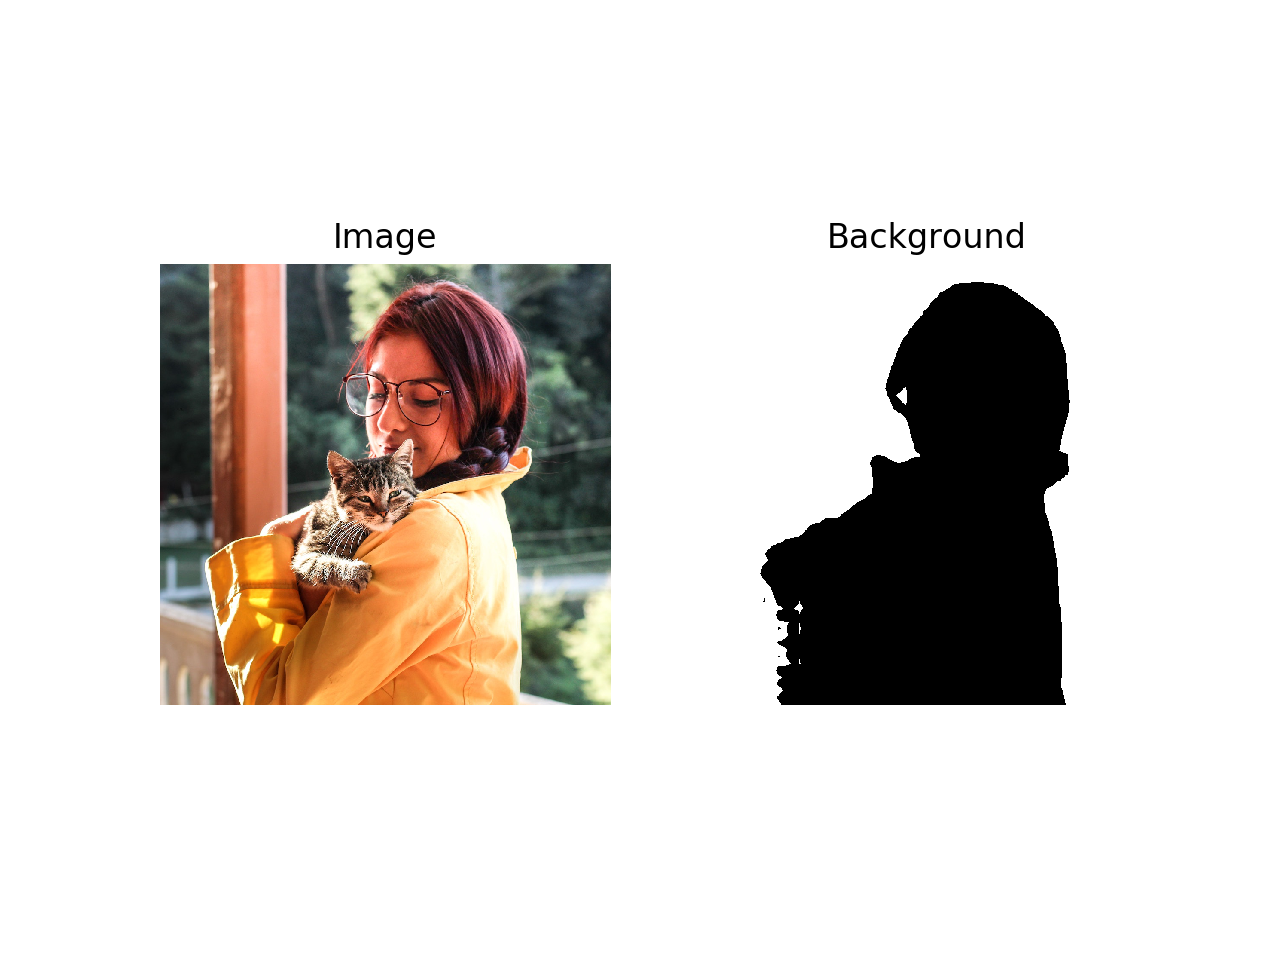

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J2NsYXNzX2lkJywgbWF4PTIwKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWnigKY=


In [72]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# List of labels
labels = ['Background','Plane','Bicycle','Bird','Boat','Bottle','Bus','Car','Cat','Chair','Cow','Diningtable','Dog','Horse','Motorbike','Person','Pottedplant','Sheep','Sofa','Train','Tvmonitor']

# Print statistics
print('Statistics:')
nb_pixels = mask.size
for i in range(len(labels)):
    nb_pixels_for_class = float(len(np.nonzero(mask==i)[0]))
    print("  %-12s : %4.1f %%" % (labels[i], 100 * nb_pixels_for_class / nb_pixels))
    
# Display the image and the mask
out = np.zeros(mask.shape)
f, ax = plt.subplots(1,2)
img_ax0 = ax[0].imshow(img, vmin=0., vmax=1., cmap='gray')
img_ax1 = ax[1].imshow(out, vmin=0., vmax=1., cmap='gray')
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[0].set_title('Image')
ax[1].set_title('Mask')
plt.show()

# Update the display
def update(class_id):
    out = np.zeros(mask.shape)
    out[mask==class_id] = 1
    img_ax1.set_array(out)
    ax[1].set_title(labels[class_id])
    f.canvas.draw()

interact(update, class_id=widgets.IntSlider(min=0, max=len(labels)-1,step=1,value=0));